# Import libraries and data sets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
#read csv while interpreting dates
covid = pd.read_csv('covid.csv', parse_dates=[0], infer_datetime_format=True)

# Data cleaning

In [3]:
#drop useless columns
covid = covid.drop(columns = ['As of time', 'Number of newly confirmed cases reported in the past 14 days', 'Remark'])

In [4]:
#filter only rows with HK and US
HK = covid.loc[covid['Countries/areas'] == 'Hong Kong Special Administrative Region']
US = covid.loc[covid['Countries/areas'] == 'United States of America']
HK.head(100)

,As of date,Countries/areas,Cumulative number of confirmed cases,Cumulative number of deaths among confirmed cases
82,2020-03-26,Hong Kong Special Administrative Region,411,4
282,2020-03-27,Hong Kong Special Administrative Region,454,4
486,2020-03-28,Hong Kong Special Administrative Region,519,4
690,2020-03-29,Hong Kong Special Administrative Region,583,4
894,2020-03-30,Hong Kong Special Administrative Region,642,4
...,...,...,...,...
20543,2020-06-29,Hong Kong Special Administrative Region,1200,7
20761,2020-06-30,Hong Kong Special Administrative Region,1204,7
20979,2020-07-01,Hong Kong Special Administrative Region,1206,7
21197,2020-07-02,Hong Kong Special Administrative Region,1234,7


Derive daily cases from cumulative cases

In [6]:
def derive_daily(df):
    #use shifted - cumulative to derive daily cases
    #confirmed cases
    cumulative = df['Cumulative number of confirmed cases']
    shifted = cumulative[1:]
    cumulative = cumulative[:-1]
    shifted = shifted.reset_index(drop=True)
    cumulative = cumulative.reset_index(drop=True)
    daily_confirm = shifted - cumulative
    #death
    cumulative = df['Cumulative number of deaths among confirmed cases']
    shifted = cumulative[1:]
    cumulative = cumulative[:-1]
    shifted = shifted.reset_index(drop=True)
    cumulative = cumulative.reset_index(drop=True)
    daily_death = shifted - cumulative
    #append to df
    df = df[1:]
    df = df.reset_index(drop=True)
    df.loc[:,'Number of confirmed cases'] = daily_confirm
    df.loc[:,'Number of deaths among confirmed cases'] = daily_death
    return df

In [7]:
HK = derive_daily(HK)
US = derive_daily(US)

# Plotting

In [8]:
def plot(df, loc=0):
    f = plt.figure()
    ax = f.add_subplot(1, 1, 1)
    ax.bar(df['As of date'], df['Number of confirmed cases'], label='Confirmed')
    ax.bar(df['As of date'], df['Number of deaths among confirmed cases'], label='Death')
    ax.set_title(f'{df.name} Daily Covid-19 Tally')
    ax.legend(loc=loc)
    locator = mdates.AutoDateLocator(minticks=3, maxticks=9)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

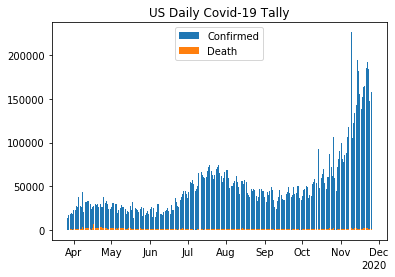

In [9]:
US.name = 'US'
plot(US, loc=9)

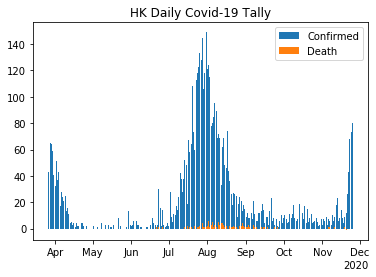

In [10]:
HK.name = 'HK'
plot(HK, loc=1)

The following cell ask for input return queried region plot

Honduras


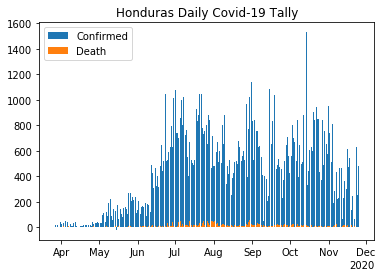

In [12]:
query = input()
region = covid.loc[covid['Countries/areas'] == query]
region = derive_daily(region)
region.name = query
plot(region)